In [1]:
%load_ext autoreload
%autoreload 2

import sympy
sympy.init_printing() #pretty printing

In [2]:
# Evaluate an expression
x = sympy.Symbol('x')
sympy.sqrt(x**2) #sympy will fail to simplify because it has no information on x

In [3]:
# Specifying y is a positive number will help evaluate
y = sympy.Symbol('y', positive=True)
sympy.sqrt(y**2)

In [4]:
# Rational expressions

r1 = sympy.Rational(2, 3)
r2 = sympy.Rational(4, 5)
r1 * r2

In [5]:
r1/r2

$$
cos^2θe^{-itE_1/\hbar} +sin^2\theta e^{-itE_2/\hbar}
$$

In [6]:
theta,t,E1,E2,h = sympy.symbols('theta,t,E_1,E_2,h', real=True)
v = sympy.cos(theta)**2*sympy.exp(-sympy.I*t*E1/h) + sympy.sin(theta)**2*sympy.exp(-sympy.I*t*E2/h)
v

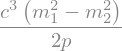

In [7]:
#Simplification

c,p,m = sympy.symbols('c,p,m')
m1,m2 =sympy.symbols('m_1,m_2')
E = p*c*(1+m**2*c**2/(2*p**2))
E
sympy.simplify(E.subs({m:m1})-E.subs({m:m2}))

### Integration
$ \int_{-1}^1 2\sqrt{(1-x^2)} = \pi$

In [8]:
x = sympy.symbols('x')
f = 2 * sympy.sqrt(1-x**2)
a,b = -1,1
sympy.integrate(f, (x,a,b))

In [9]:
t,x,y = sympy.symbols('t,x,y')
C = sympy.Curve([sympy.cos(t), sympy.sin(t)], (t, 0, 2*sympy.pi))

$\int_C 1 = 2π $

In [10]:
sympy.line_integrate(1,C,[x,y])

$\int_C x^2y^2 = \pi/4 $

In [11]:
sympy.line_integrate(x**2*y**2,C,[x,y])

### Laplace Transform

In [12]:
s = sympy.symbols('s')
a,t = sympy.symbols('a,t', positive=True)
f = sympy.sin(a*t)

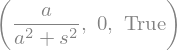

In [13]:
sympy.laplace_transform(f,t,s)

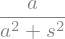

In [14]:
sympy.laplace_transform(f,t,s, noconds=True)

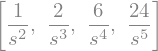

In [15]:
[sympy.laplace_transform(f,t,s, noconds=True) for f in [t,t**2, t**3, t**4]]

In [16]:
n = sympy.symbols('n', positive=True)
sympy.laplace_transform(t**n,t,s, noconds=True)

In [17]:
n = sympy.symbols('n', integer = True, positive=True)
sympy.laplace_transform(t**n,t,s, noconds=True)

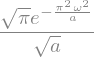

In [18]:
a = sympy.symbols('a', positive=True)
t,w = sympy.symbols('t, omega')
f = sympy.exp(-a*(t**2))
sympy.fourier_transform(f,t,w)

### Solving ODEs

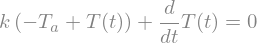

In [19]:
t,k,T0,Ta = sympy.symbols('t,k,T_0, T_a')
T = sympy.Function('T')
ode = T(t).diff(t) + k*(T(t)-Ta)
sympy.Eq(ode,0)

In [20]:
ode_solution = sympy.dsolve(ode)
ode_solution

In [21]:
ics = {T(0):T0}
#Get the equation resulting by sustituting t for 0 and T(0) for T0
C_eq = ode_solution.subs(t,0).subs(ics)
C_eq

In [22]:
#Solve for C1
C_sol = sympy.solve(C_eq)
C_sol

In [23]:
#plug the value for C1 into the ode solution
ode_solution.subs(C_sol[0])

In [24]:
from odes import apply_ics
# function to do the substitution
apply_ics(ode_solution, ics, t, [k,Ta])

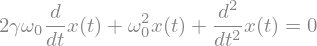

In [25]:
# Solve a more complex ODE: damped harmonic oscillato
t, omega0, gamma = sympy.symbols('t, omega_0, gamma', positive=True)
x = sympy.Function(x)
ode = x(t).diff(t,2) + 2*gamma*omega0*x(t).diff(t) + omega0**2*x(t)
sympy.Eq(ode,0)

In [26]:
harmonic_solution = sympy.dsolve(ode)
harmonic_solution

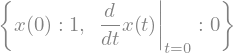

In [27]:
ics = {x(0): 1, x(t).diff(t).subs(t,0): 0}
ics

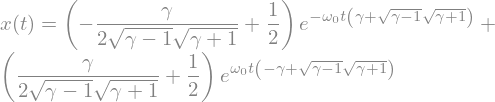

In [28]:
x_t_sol = apply_ics(harmonic_solution, ics, t, [omega0,gamma])
x_t_sol

In [29]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

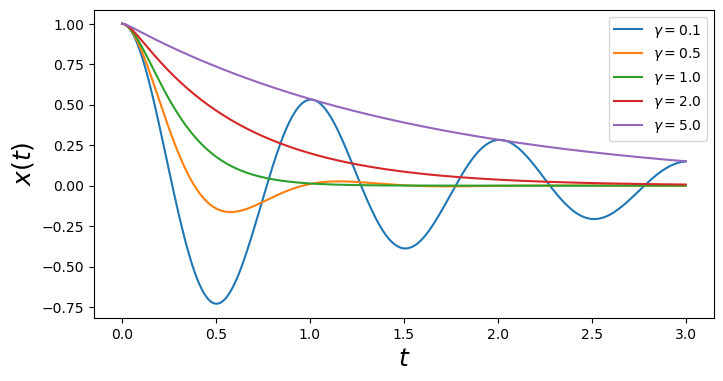

In [30]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,4))
tt = np.linspace(0,3,250)
w0 = 2*sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t,x_t_critical.subs({omega0: w0}), 'numpy')
    else:
        x_t = sympy.lambdify(t,x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r'$γ = %.1f$' % g)

ax.set_xlabel(r'$t$', fontsize=18)
ax.set_ylabel(r'$x(t)$', fontsize=18)
ax.legend()

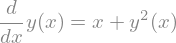

In [31]:
# In this example, sympy can only find an approximation
x = sympy.symbols('x')
y = sympy.Function('y')
f = y(x)**2+x
sympy.Eq(y(x).diff(x), f)

In [32]:
sympy.dsolve(y(x).diff(x) - f)

TypeError: bad operand type for unary -: 'list'

In [33]:
# In this example, sympy cannot find anything
sympy.dsolve(y(x).diff(x,2) - f)

NotImplementedError: solve: Cannot solve -x - y(x)**2 + Derivative(y(x), (x, 2))

# Parsing

In [34]:
from sympy.parsing.sympy_parser import parse_expr

In [35]:
# Parse an expression from a string
f = parse_expr("X**2+1")
f

In [36]:
# Turn it into a function
from sympy import symbols, lambdify

X = symbols('X')
F = lambdify(X, f, 'numpy')

In [37]:
x = np.linspace(0, 1, 6)
print(x)

[0.  0.2 0.4 0.6 0.8 1. ]


In [38]:
#Evaluate the function
print(F(x))

[1.   1.04 1.16 1.36 1.64 2.  ]
